## Reference : 
- https://www.kaggle.com/julian3833/jigsaw-incredibly-simple-naive-bayes-0-768
- https://www.kaggle.com/samarthagarwal23/mega-b-ridge-to-the-top-0-84 

# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import TransformerMixin, BaseEstimator
import re 
import scipy
from scipy import sparse
import gc 
from IPython.display import display, HTML
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")


pd.options.display.max_colwidth=300

# Training data 

## Convert the label to SUM of all toxic labels (This might help with maintaining toxicity order of comments)

In [2]:
df = pd.read_csv("../input/jigsaw-toxic-comment-classification-challenge/train.csv")
print(df.shape)

for col in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    print(f'****** {col} *******')
    display(df.loc[df[col]==1,['comment_text',col]].sample(10))

(159571, 8)
****** toxic *******


,comment_text,toxic
151510,fuck you...my wish...its a public property,1
102804,"Yes, I was blocked for losing patience with you, and what I did then would constitute personal attack. Honest outspoken criticism that is based on fact is permitted though, and the shameless hate speech expressed here deserves more than just vocal criticism. As for you, I'll discuss you elsewher...",1
55900,"""\n\n Blow me. \n\nI'll """"attack"""" you all I want, and there ain't nothin' you can do about it. Peace.""",1
106931,Shut up you fucking loser. Get a life you fat fuck. \n\n````,1
20769,Hello \n\nYou are a racist! From 108.67.65.222,1
97903,"""\nSeriously, what is your problem? Do you think the paragraph deletion and the insertion of the word """"nipples"""" was correct? Are you just too lazy to type anything? Or, are you just an asshole who doesn't really care about vandalism? """,1
107096,You Cunt \nGo fuck yourself you piece of shit. Don't make me tea beg your mama you faggot!!!,1
1355,Always good to have the ignorant and mentally defective getting together. Die soon,1
92836,"""Why did you have to be such a sniveling f@##ing geek and delete that page??? Vandalism you say? No page with that name exists!!! What exactly am I vandalizing? By deleting the page I say you are the vandal! If you would like to add to the page or change it to a more signifacant """"Boyoung Son...",1
96572,You are really a stupid fuck if you dont even know your teams history\nYilmaz Gokdel was a real Galatasarayli and he coached galatasaray in the seventies\nyour list says Gokdel was never coach.\n\nthats not corret\n\nGokdel was succeeded by Don Hawe !!\nthat means that Gokdel started off as coac...,1


****** severe_toxic *******


,comment_text,severe_toxic
83496,Suck my dikkkkk ==\nSuck my dikkkkk,1
30409,by the way I AM A FUCKIN FAG FUCK U,1
21201,Fuck you bitch! I will go to your house and kill you with my gun as well! Prepare to die!,1
148929,FC*K U\n\nWhy the fc*k should I get a warning for doing nothing?\n\nFC*K U\n\nWhy the fc*k should I get a warning for doing nothing?\n\nFC*K U\n\nWhy the fc*k should I get a warning for doing nothing?\n\nFC*K U\n\nWhy the fc*k should I get a warning for doing nothing?\n\nFC*K U\n\nWhy the fc*k s...,1
116139,FUK U BITCH U BEST BAN ME NOW,1
122718,mang \n\nmang i fucked this one girl so hard in her asshole it turned into a rosebud then i made her cum all ova da place,1
2249,YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! ...,1
35453,. UR SUCH A FUCKING GEEK ASS MOFO! UR MOTHERS SUCKING MY COCK RIGHT NOW FAGETASS!!!!!!,1
103571,GET THE HELL OUT OF MY BISSINESS ASS BANG 166.170.35.202,1
44136,"Chanting Fox \n\nShut up you dumb cunt. Your a nigger loving, cum cuzzling crack whore bitch!",1


****** obscene *******


,comment_text,obscene
153358,"GAYYYYYYYYYYYYYYYYYYYYYYYY\nYour blatantly Gay Mate (The People Who Declined My Unblocking).\nYOU ALL FAGGOTS.\nYOU SMELL.\nSTUPID KIPPER HADDOCKS.\nGAYYYY.\nand claiming 'I AM GAY' is vandelism is homophobic,\nFAGGOTTS.",1
113229,takes it up the arse. takes it up the arse. takes it up the arse. takes it up the arse. takes it up the arse. takes it up the arse. takes it up the arse. takes it up the arse. takes it up the arse. takes it up the arse. takes it up the arse. takes it up the arse. takes it up the arse...,1
117463,"Take the latter part of your advice, then shove the rest of the message right up your ass.",1
10159,"I Dream of Jesus == \n \nWhy did you feel the need to revert my SOURCED edit in the I Dream of Jesus article? You may think that you have some kind of ownership over the content of this article, but you are sadly mistaken. I suggest that in the future, you keep your hands off of the LEGITIM...",1
73821,"Shut up you asswipe, we don't care. I'll decapitate your mother and shit down her(his?) neck. Go back to Jewland you fuck. \n\nhttp://en.wikipedia.org/wiki/The_Real_Stephen_Hawkinghttp://en.wikipedia.org/wiki/The_Real_Stephen_Hawkinghttp://en.wikipedia.org/wiki/The_Real_Stephen_Hawkinghttp://en....",1
10085,How the fuck...damn you maust get a shitload of ass. Please tell me if you do or not. Please. FUCK the Giants!!!!!!! Go PATS!!!!!!! Fuck the Yankees!!!!!!!!!!11,1
29987,WIKIPEDIA SUCKS \n\nWIKIPEDIA SUCKS WEENIES,1
139892,"you shut your whore mouth \n\n An open letter from the Wikipedia Review \n\nThis is a message to Beam,\n\nWhat the fuck do you think this is, some place where you can just waltz in unannounced and be received with arms wide open? WELL FUCK THAT! This is motherfucking Wikipedia, bitch. WE call th...",1
32489,WHOEVER THIS IS FUCK OFF,1
68281,good thing you are blocked you fucking scumbag,1


****** threat *******


,comment_text,threat
75557,"""\nChristians\nWhat about all the idiot Christians who will come on this page and claim that this thing never existed and they'll just change the article to one big """"GOOOOOOOOOOOOOOD DIIIIIIIIIIID IIIIIIIIIIIIT""""? Fucking stupid Christians, they believe dinosaurs didn't exist and their whole ig...",1
133551,"and your little faggot boy Propol, pray, pray little wonk that I don't find your little ass and kill you",1
57849,My mate told me you were a fuckin homosexual. You are dead.,1
35032,I am going to shoot you in the head and laugh as your brains splatter onto the ground and blood pools around your corpse. \n\nI am going to shoot you in the head and laugh as your brains splatter onto the ground and blood pools around your corpse.,1
35016,Please go and kill yourself. You clearly have nothing better to do on wikipedia than try and fuck it up for other people. We have no need for your kind. (talk),1
16939,"That's funny. You was personally offended? So the bad things writer new you, your name etc, right? \nAnd one get offended by a comment, or epithets on a website, then that same person must grow up spiritually for some more 5 centuries at least.\nAnd if one get more offended by the previous comme...",1
96664,I'm going to kill you \n\nZink Dawg your a Scrap and a fag and you need to die. I'm going to kill you if someone else doesn't. You better keep protecting your user space because I will keep vandalizing it.,1
1878,"Aaron Swartz \n\nStop fucking reverting my goddamn edits!!! I think Aaron Swartz is a dumb-ass, and he should have been\nkilled a long time ago. I know where you live; I WILL KILL YOU IF YOU REVERT ANY MORE PAGES!!!!!",1
117770,hey pice of shit don't tell me what to write on wikipedia...i'm gona hunt you down and kill everyone you ever loved,1
17852,"I'll fucking eat your queef asshole \n\nIf you talk on my talk page, I'll rape your family you niggerlover.",1


****** insult *******


,comment_text,insult
126197,"FC Bayern Roster edits \n\nFootnote 148, which I placed. Yes, this guy, explains exactly why those players are not on the current squad. And as for edits, it's on bitch. Don't ever fucking block my shit again. This is war. It's on, baby.\n\nDon't.\nWaste.\nMy.\nTime.\nEver.\nAgain.",1
103298,"""\n\n I freaking hate this show \n\nthe rifleman is freaking crapping stupid\nrobot chicken is 1,00,000 times better than bull creap ripleman \ni think chuck connors should curl up in a ball and i will shove him in a box and float him down the river because the rifle boy or what ever chuck des...",1
100693,Get A Life! \n\nl00zer,1
47687,"Go F yourself\n\nYou are so typical of your type: the hypocritical ignorant child editor. I highlight your arrogance, stupidity and laziness, and what do you do? Alter your talk page to remove it and then have the sheer gall to send me a warning. Try spelling HYPOCRITE. But then, that would requ...",1
111191,I hate u you. Your shit on a banana,1
43044,"Don't screw me \nHey don't screw me more. Im doing contributions for wikipedia and you are screwing me, what's your problem? Leave me alone, you don't have your own life, like Jenkins in South Park. Leave me alone, you fag.",1
43844,Of course Uber here would just love to shove that green rotting foot up his pussy.,1
136299,You just fucked with the wrong dude \n\nYou messed with the real law now and you fucked up175.38.160.39,1
101099,What RealDealBillMcNeal really is \n\nRealDealBillMcNeal is a big fat retard.,1
26133,i hope you feel like shit for deleting my post. go fuck yourself,1


****** identity_hate *******


,comment_text,identity_hate
22025,Get a life you animal fucker\nShut up you fucking nigger. Fuck off and shit your pants full of all the shit you can fill them with. 144.131.176.126,1
132566,i hope you die you fucking pedophile. i gave your details to some friends in the middle east and they were VERY angry about you and said they might pay you a visit,1
32400,THAT WAS REALLY MILLESECONDS WASNT IT BITCH \n\nFAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW ...,1
79541,Roman Catholics\n\ni'm not accusing you but i think you're a fenian. You are ugly and probably the seventh born in a family. You have probably been molested at some point by a priest. You disgust me. SIEG HEIL!,1
85797,"MuZemike \n\nalso MuZemike is a dirty little faggot queer too. His name makes him appear to be a nigger too. What a douche, right?",1
19559,"probably that you are a german... fucking germans, nothing changes",1
113857,Your cause is nonsense. You are a Mossad terrorist.,1
4288,Are you a faggot or what?,1
135365,which one you faild the exams or the names? I've heard that bulgarian women don't wash...errr that's stinky smelling bad..,1
45101,"WHO CARES ABOUT A BUNCH OF DIRTY MONKEYS FROM HAITI. MONCRIEF, WHAT ARE YOU A JEW?.",1


In [3]:

# Give more weight to severe toxic 
df['severe_toxic'] = df.severe_toxic * 2
df['y'] = (df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) ).astype(int)
df['y'] = df['y']/df['y'].max()

df = df[['comment_text', 'y']].rename(columns={'comment_text': 'text'})
df.sample(5)

,text,y
112242,"""Welcome!\n\nHello, , and welcome to Wikipedia! Thank you for your contributions. I hope you like the place and decide to stay. Here are some pages that you might find helpful:\nThe five pillars of Wikipedia\nTutorial\nHow to edit a page\nHow to write a great article\nManual of Style\nI hope you...",0.0
106005,"""\n\n Textbooks \n\nThis edit removed material from the article regarding textbook coverage of the study which leaves the current version in a WP:SYNTH status. One source is not enough to make a blanket statement, nor is there any reason for removing the accurate paraphrasing of that source.Maki...",0.0
51529,"At 13:30, 16 January 2013 you, or someone using your the English Wikipedia page . Please stop this practice, or you may be blocked from editing in Wikipedia.",0.0
104619,"""\n\n Your edits on the International Space Station \n\n The Space Barnstar Just wanted to let that your work on cleaning up the International Space Station article hasn't gone unnoticed. Good work on the article so far! ) ™ """,0.0
149258,"""== Expansion needed ==\n\nPlease if anyone can help expand this article it will make for excellent reading but in its current state, it hardly offers any insight into the topic save the pictures on display. talk """,0.0


In [4]:
df['y'].value_counts()

0.000000    143346
0.142857      6360
0.428571      4064
0.285714      3439
0.714286      1064
0.571429       938
0.857143       329
1.000000        31
Name: y, dtype: int64

## Create 3 versions of the data

In [5]:
n_folds = 7

frac_1 = 0.7
frac_1_factor = 1.5

for fld in range(n_folds):
    print(f'Fold: {fld}')
    tmp_df = pd.concat([df[df.y>0].sample(frac=frac_1, random_state = 10*(fld+1)) , 
                        df[df.y==0].sample(n=int(len(df[df.y>0])*frac_1*frac_1_factor) , 
                                            random_state = 10*(fld+1))], axis=0).sample(frac=1, random_state = 10*(fld+1))

    tmp_df.to_csv(f'/kaggle/working/df_fld{fld}.csv', index=False)
    print(tmp_df.shape)
    print(tmp_df['y'].value_counts())

Fold: 0
(28394, 2)
0.000000    17036
0.142857     4433
0.428571     2823
0.285714     2442
0.714286      742
0.571429      673
0.857143      223
1.000000       22
Name: y, dtype: int64
Fold: 1
(28394, 2)
0.000000    17036
0.142857     4432
0.428571     2840
0.285714     2391
0.714286      751
0.571429      685
0.857143      237
1.000000       22
Name: y, dtype: int64
Fold: 2
(28394, 2)
0.000000    17036
0.142857     4472
0.428571     2818
0.285714     2404
0.714286      735
0.571429      661
0.857143      248
1.000000       20
Name: y, dtype: int64
Fold: 3
(28394, 2)
0.000000    17036
0.142857     4469
0.428571     2842
0.285714     2415
0.714286      719
0.571429      657
0.857143      240
1.000000       16
Name: y, dtype: int64
Fold: 4
(28394, 2)
0.000000    17036
0.142857     4437
0.428571     2869
0.285714     2389
0.714286      745
0.571429      679
0.857143      218
1.000000       21
Name: y, dtype: int64
Fold: 5
(28394, 2)
0.000000    17036
0.142857     4480
0.428571     2840
0.

# Create 3 versions of __clean__ data

In [6]:
def clean(data, col):

    # Clean some punctutations
    data[col] = data[col].str.replace('\n', ' \n ')
    data[col] = data[col].str.replace(r'([a-zA-Z]+)([/!?.])([a-zA-Z]+)',r'\1 \2 \3')
    # Replace repeating characters more than 3 times to length of 3
    data[col] = data[col].str.replace(r'([*!?\'])\1\1{2,}',r'\1\1\1')    
    # Add space around repeating characters
    data[col] = data[col].str.replace(r'([*!?\']+)',r' \1 ')    
    # patterns with repeating characters 
    data[col] = data[col].str.replace(r'([a-zA-Z])\1{2,}\b',r'\1\1')
    data[col] = data[col].str.replace(r'([a-zA-Z])\1\1{2,}\B',r'\1\1\1')
    data[col] = data[col].str.replace(r'[ ]{2,}',' ').str.strip()   
    
    return data

In [7]:
# Test clean function
test_clean_df = pd.DataFrame({"text":
                              ["heyy\n\nkkdsfj",
                               "hi   how/are/you ???",
                               "hey?????",
                               "noooo!!!!!!!!!   comeone !! ",
                              "cooooooooool     brooooooooooo  coool brooo",
                              "naaaahhhhhhh"]})
display(test_clean_df)
clean(test_clean_df,'text')

,text
0,heyy\n\nkkdsfj
1,hi how/are/you ???
2,hey?????
3,noooo!!!!!!!!! comeone !!
4,cooooooooool brooooooooooo coool brooo
5,naaaahhhhhhh


,text
0,heyy \n \n kkdsfj
1,hi how / are/you ???
2,hey ???
3,noo !!! comeone !!
4,coool broo coool broo
5,naaahh


In [8]:
df = clean(df,'text')

In [9]:
n_folds = 7

frac_1 = 0.7
frac_1_factor = 1.5

for fld in range(n_folds):
    print(f'Fold: {fld}')
    tmp_df = pd.concat([df[df.y>0].sample(frac=frac_1, random_state = 10*(fld+1)) , 
                        df[df.y==0].sample(n=int(len(df[df.y>0])*frac_1*frac_1_factor) , 
                                            random_state = 10*(fld+1))], axis=0).sample(frac=1, random_state = 10*(fld+1))

    tmp_df.to_csv(f'/kaggle/working/df_clean_fld{fld}.csv', index=False)
    print(tmp_df.shape)
    print(tmp_df['y'].value_counts())

Fold: 0
(28394, 2)
0.000000    17036
0.142857     4433
0.428571     2823
0.285714     2442
0.714286      742
0.571429      673
0.857143      223
1.000000       22
Name: y, dtype: int64
Fold: 1
(28394, 2)
0.000000    17036
0.142857     4432
0.428571     2840
0.285714     2391
0.714286      751
0.571429      685
0.857143      237
1.000000       22
Name: y, dtype: int64
Fold: 2
(28394, 2)
0.000000    17036
0.142857     4472
0.428571     2818
0.285714     2404
0.714286      735
0.571429      661
0.857143      248
1.000000       20
Name: y, dtype: int64
Fold: 3
(28394, 2)
0.000000    17036
0.142857     4469
0.428571     2842
0.285714     2415
0.714286      719
0.571429      657
0.857143      240
1.000000       16
Name: y, dtype: int64
Fold: 4
(28394, 2)
0.000000    17036
0.142857     4437
0.428571     2869
0.285714     2389
0.714286      745
0.571429      679
0.857143      218
1.000000       21
Name: y, dtype: int64
Fold: 5
(28394, 2)
0.000000    17036
0.142857     4480
0.428571     2840
0.

In [10]:
del df,tmp_df
gc.collect()

21

## Ruddit data

(5838, 5)


<AxesSubplot:>

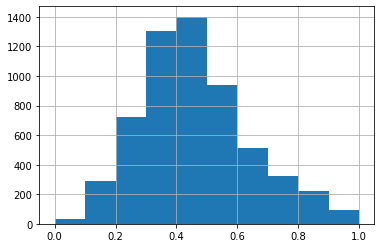

In [11]:
df_ = pd.read_csv("../input/ruddit-jigsaw-dataset/Dataset/ruddit_with_text.csv")
print(df_.shape)

df_ = df_[['txt', 'offensiveness_score']].rename(columns={'txt': 'text',
                                                                'offensiveness_score':'y'})

df_['y'] = (df_['y'] - df_.y.min()) / (df_.y.max() - df_.y.min()) 
df_.y.hist()

# Create 3 versions of data

In [12]:
n_folds = 7

frac_1 = 0.7

for fld in range(n_folds):
    print(f'Fold: {fld}')
    tmp_df = df_.sample(frac=frac_1, random_state = 10*(fld+1))
    tmp_df.to_csv(f'/kaggle/working/df2_fld{fld}.csv', index=False)
    print(tmp_df.shape)
    print(tmp_df['y'].value_counts())

Fold: 0
(4087, 2)
0.464668    125
0.475910    106
0.375268     94
0.442719     92
0.364561     89
           ... 
0.400964      1
0.889722      1
0.582976      1
0.404711      1
0.761242      1
Name: y, Length: 268, dtype: int64
Fold: 1
(4087, 2)
0.464668    107
0.475910    103
0.408994    102
0.386510     97
0.364561     88
           ... 
0.851713      1
0.859743      1
0.051927      1
0.666488      1
0.594754      1
Name: y, Length: 264, dtype: int64
Fold: 2
(4087, 2)
0.464668    118
0.475910    102
0.386510     94
0.442719     92
0.364561     89
           ... 
0.261777      1
0.238223      1
0.123126      1
0.694861      1
0.309422      1
Name: y, Length: 265, dtype: int64
Fold: 3
(4087, 2)
0.464668    116
0.475910    106
0.386510     93
0.408994     92
0.364561     90
           ... 
0.238223      1
0.561028      1
0.404711      1
0.806210      1
0.184154      1
Name: y, Length: 263, dtype: int64
Fold: 4
(4087, 2)
0.464668    122
0.475910    114
0.386510    100
0.442719     91
0.

In [13]:
del tmp_df, df_; 
gc.collect()

42

## Load Validation and Test data  


In [14]:
# Validation data 

df_val = pd.read_csv("../input/jigsaw-toxic-severity-rating/validation_data.csv")

In [15]:
# Test data

df_sub = pd.read_csv("../input/jigsaw-toxic-severity-rating/comments_to_score.csv")


# Create Sklearn Pipeline with 
## TFIDF - Take 'char_wb' as analyzer to capture subwords well
## Ridge - Ridge is a simple regression algorithm that will reduce overfitting 

In [16]:
# NOT USED 
class LengthTransformer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return sparse.csr_matrix([[(len(x)-360)/550] for x in X])
    def get_feature_names(self):
        return ["lngth"]

class LengthUpperTransformer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return sparse.csr_matrix([[sum([1 for y in x if y.isupper()])/len(x)] for x in X])
    def get_feature_names(self):
        return ["lngth_uppercase"]

### Does % of uppercase characters have effect on toxicity


0.06762926181756569 0.1429820536279063
0.10522553566497922 0.20361944552165576


<AxesSubplot:>

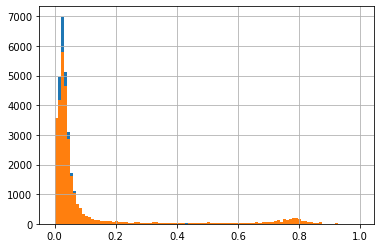

In [17]:

df_val['upper_1'] = np.array(LengthUpperTransformer().transform(df_val['less_toxic']).todense()).reshape(-1,1)
df_val['upper_2'] = np.array(LengthUpperTransformer().transform(df_val['more_toxic']).todense()).reshape(-1,1)

print(df_val['upper_1'].mean(), df_val['upper_1'].std())
print(df_val['upper_2'].mean(), df_val['upper_2'].std())

df_val['upper_1'].hist(bins=100)
df_val['upper_2'].hist(bins=100)

## Train pipeline

- Load folds data
- train pipeline
- Predict on validation data
- Predict on test data

### Toxic data

In [18]:
val_preds_arr1 = np.zeros((df_val.shape[0], n_folds))
val_preds_arr2 = np.zeros((df_val.shape[0], n_folds))
test_preds_arr = np.zeros((df_sub.shape[0], n_folds))

for fld in range(n_folds):
    print("\n\n")
    print(f' ****************************** FOLD: {fld} ******************************')
    df = pd.read_csv(f'/kaggle/working/df_fld{fld}.csv')
    print(df.shape)

    features = FeatureUnion([
        #('vect1', LengthTransformer()),
        #('vect2', LengthUpperTransformer()),
        ("vect3", TfidfVectorizer(min_df= 3, max_df=0.5, analyzer = 'char_wb', ngram_range = (3,5))),
        #("vect4", TfidfVectorizer(min_df= 5, max_df=0.5, analyzer = 'word', token_pattern=r'(?u)\b\w{8,}\b')),

    ])
    pipeline = Pipeline(
        [
            ("features", features),
            #("clf", RandomForestRegressor(n_estimators = 5, min_sample_leaf=3)),
            ("clf", Ridge()),
            #("clf",LinearRegression())
        ]
    )
    print("\nTrain:")
    # Train the pipeline
    pipeline.fit(df['text'], df['y'])
    
    # What are the important features for toxicity

    print('\nTotal number of features:', len(pipeline['features'].get_feature_names()) )

    feature_wts = sorted(list(zip(pipeline['features'].get_feature_names(), 
                                  np.round(pipeline['clf'].coef_,2) )), 
                         key = lambda x:x[1], 
                         reverse=True)

    pprint(feature_wts[:30])
    
    print("\npredict validation data ")
    val_preds_arr1[:,fld] = pipeline.predict(df_val['less_toxic'])
    val_preds_arr2[:,fld] = pipeline.predict(df_val['more_toxic'])

    print("\npredict test data ")
    test_preds_arr[:,fld] = pipeline.predict(df_sub['text'])




 ****************************** FOLD: 0 ******************************
(28394, 2)

Train:

Total number of features: 146616
[('vect3__uck', 0.53),
 ('vect3__fuc', 0.49),
 ('vect3__ ass', 0.4),
 ('vect3__fuck', 0.38),
 ('vect3__ f ', 0.34),
 ('vect3__ass', 0.32),
 ('vect3__fag', 0.32),
 ('vect3__shit', 0.31),
 ('vect3__ f*', 0.3),
 ('vect3__ fag', 0.29),
 ('vect3__gay', 0.28),
 ('vect3__nig', 0.28),
 ('vect3__nl3', 0.28),
 ('vect3__ fu', 0.27),
 ('vect3__dick', 0.27),
 ('vect3__hit', 0.27),
 ('vect3__nigg', 0.27),
 ('vect3__ck ', 0.26),
 ('vect3__fuk', 0.26),
 ('vect3__ g ', 0.25),
 ('vect3__ nl', 0.25),
 ('vect3__ die', 0.24),
 ('vect3__ gay', 0.24),
 ('vect3__dum', 0.24),
 ('vect3__gga', 0.24),
 ('vect3__kill ', 0.24),
 ('vect3__ ass.', 0.23),
 ('vect3__ u ', 0.23),
 ('vect3__cun', 0.23),
 ('vect3__igg', 0.23)]

predict validation data 

predict test data 



 ****************************** FOLD: 1 ******************************
(28394, 2)

Train:

Total number of features: 145297


# Toxic __clean__ data

In [19]:
val_preds_arr1c = np.zeros((df_val.shape[0], n_folds))
val_preds_arr2c = np.zeros((df_val.shape[0], n_folds))
test_preds_arrc = np.zeros((df_sub.shape[0], n_folds))

for fld in range(n_folds):
    print("\n\n")
    print(f' ****************************** FOLD: {fld} ******************************')
    df = pd.read_csv(f'/kaggle/working/df_clean_fld{fld}.csv')
    print(df.shape)

    features = FeatureUnion([
        #('vect1', LengthTransformer()),
        #('vect2', LengthUpperTransformer()),
        ("vect3", TfidfVectorizer(min_df= 3, max_df=0.5, analyzer = 'char_wb', ngram_range = (3,5))),
        #("vect4", TfidfVectorizer(min_df= 5, max_df=0.5, analyzer = 'word', token_pattern=r'(?u)\b\w{8,}\b')),

    ])
    pipeline = Pipeline(
        [
            ("features", features),
            #("clf", RandomForestRegressor(n_estimators = 5, min_sample_leaf=3)),
            ("clf", Ridge()),
            #("clf",LinearRegression())
        ]
    )
    print("\nTrain:")
    # Train the pipeline
    pipeline.fit(df['text'], df['y'])
    
    # What are the important features for toxicity

    print('\nTotal number of features:', len(pipeline['features'].get_feature_names()) )

    feature_wts = sorted(list(zip(pipeline['features'].get_feature_names(), 
                                  np.round(pipeline['clf'].coef_,2) )), 
                         key = lambda x:x[1], 
                         reverse=True)

    pprint(feature_wts[:30])
    
    print("\npredict validation data ")
    val_preds_arr1c[:,fld] = pipeline.predict(df_val['less_toxic'])
    val_preds_arr2c[:,fld] = pipeline.predict(df_val['more_toxic'])

    print("\npredict test data ")
    test_preds_arrc[:,fld] = pipeline.predict(df_sub['text'])




 ****************************** FOLD: 0 ******************************
(28394, 2)

Train:

Total number of features: 133784
[('vect3__uck', 0.5),
 ('vect3__ f ', 0.48),
 ('vect3__fuc', 0.45),
 ('vect3__ ass', 0.37),
 ('vect3__fuck', 0.35),
 ('vect3__shit', 0.32),
 ('vect3__ ck', 0.31),
 ('vect3__fag', 0.31),
 ('vect3__ fu', 0.29),
 ('vect3__ass', 0.29),
 ('vect3__ k ', 0.28),
 ('vect3__ re ', 0.28),
 ('vect3__hit', 0.28),
 ('vect3__ck ', 0.27),
 ('vect3__fuk', 0.27),
 ('vect3__nig', 0.27),
 ('vect3__nl3', 0.27),
 ('vect3__ fag', 0.26),
 ('vect3__gga', 0.26),
 ('vect3__dick', 0.25),
 ('vect3__gay', 0.25),
 ('vect3__suck', 0.25),
 ('vect3__ ass.', 0.24),
 ('vect3__ g ', 0.24),
 ('vect3__ gay', 0.24),
 ('vect3__ nl', 0.24),
 ('vect3__nigg', 0.24),
 ('vect3__ ass ', 0.23),
 ('vect3__ fuk', 0.23),
 ('vect3__ rape', 0.23)]

predict validation data 

predict test data 



 ****************************** FOLD: 1 ******************************
(28394, 2)

Train:

Total number of features: 13

## Ruddit data pipeline

In [20]:
val_preds_arr1_ = np.zeros((df_val.shape[0], n_folds))
val_preds_arr2_ = np.zeros((df_val.shape[0], n_folds))
test_preds_arr_ = np.zeros((df_sub.shape[0], n_folds))

for fld in range(n_folds):
    print("\n\n")
    print(f' ****************************** FOLD: {fld} ******************************')
    df = pd.read_csv(f'/kaggle/working/df2_fld{fld}.csv')
    print(df.shape)

    features = FeatureUnion([
        #('vect1', LengthTransformer()),
        #('vect2', LengthUpperTransformer()),
        ("vect3", TfidfVectorizer(min_df= 3, max_df=0.5, analyzer = 'char_wb', ngram_range = (3,5))),
        #("vect4", TfidfVectorizer(min_df= 5, max_df=0.5, analyzer = 'word', token_pattern=r'(?u)\b\w{8,}\b')),

    ])
    pipeline = Pipeline(
        [
            ("features", features),
            #("clf", RandomForestRegressor(n_estimators = 5, min_sample_leaf=3)),
            ("clf", Ridge()),
            #("clf",LinearRegression())
        ]
    )
    print("\nTrain:")
    # Train the pipeline
    pipeline.fit(df['text'], df['y'])
    
    # What are the important features for toxicity

    print('\nTotal number of features:', len(pipeline['features'].get_feature_names()) )

    feature_wts = sorted(list(zip(pipeline['features'].get_feature_names(), 
                                  np.round(pipeline['clf'].coef_,2) )), 
                         key = lambda x:x[1], 
                         reverse=True)

    pprint(feature_wts[:30])
    
    print("\npredict validation data ")
    val_preds_arr1_[:,fld] = pipeline.predict(df_val['less_toxic'])
    val_preds_arr2_[:,fld] = pipeline.predict(df_val['more_toxic'])

    print("\npredict test data ")
    test_preds_arr_[:,fld] = pipeline.predict(df_sub['text'])




 ****************************** FOLD: 0 ******************************
(4087, 2)

Train:

Total number of features: 31907
[('vect3__fuc', 0.59),
 ('vect3__fuck', 0.59),
 ('vect3__uck', 0.55),
 ('vect3__ fuc', 0.52),
 ('vect3__ fuck', 0.52),
 ('vect3__ fu', 0.42),
 ('vect3__shit', 0.4),
 ('vect3__hit', 0.37),
 ('vect3__ shit', 0.36),
 ('vect3__fuck ', 0.34),
 ('vect3__ck ', 0.32),
 ('vect3__uck ', 0.31),
 ('vect3__shi', 0.29),
 ('vect3__ shi', 0.28),
 ('vect3__ ass ', 0.27),
 ('vect3__sex', 0.26),
 ('vect3__ ass', 0.25),
 ('vect3__ dick', 0.25),
 ('vect3__dick', 0.25),
 ('vect3__ dic', 0.24),
 ('vect3__ sex', 0.24),
 ('vect3__ sh', 0.23),
 ('vect3__shit ', 0.23),
 ('vect3__ass', 0.21),
 ('vect3__ di', 0.19),
 ('vect3__ du', 0.18),
 ('vect3__!!!', 0.18),
 ('vect3__dic', 0.18),
 ('vect3__ex ', 0.18),
 ('vect3__hit ', 0.18)]

predict validation data 

predict test data 



 ****************************** FOLD: 1 ******************************
(4087, 2)

Train:

Total number of features:

In [21]:
del df, pipeline, feature_wts
gc.collect()

597

# Validate the pipeline 

In [22]:
print(" Toxic data ")
p1 = val_preds_arr1.mean(axis=1)
p2 = val_preds_arr2.mean(axis=1)

print(f'Validation Accuracy is { np.round((p1 < p2).mean() * 100,2)}')

print(" Ruddit data ")
p3 = val_preds_arr1_.mean(axis=1)
p4 = val_preds_arr2_.mean(axis=1)

print(f'Validation Accuracy is { np.round((p3 < p4).mean() * 100,2)}')

print(" Toxic CLEAN data ")
p5 = val_preds_arr1c.mean(axis=1)
p6 = val_preds_arr2c.mean(axis=1)

print(f'Validation Accuracy is { np.round((p5 < p6).mean() * 100,2)}')


 Toxic data 
Validation Accuracy is 68.46
 Ruddit data 
Validation Accuracy is 62.56
 Toxic CLEAN data 
Validation Accuracy is 68.28


In [23]:
print("Find right weight")

wts_acc = []
for i in range(30,70,1):
    for j in range(0,20,1):
        w1 = i/100
        w2 = (100 - i - j)/100
        w3 = (1 - w1 - w2 )
        p1_wt = w1*p1 + w2*p3 + w3*p5
        p2_wt = w1*p2 + w2*p4 + w3*p6
        wts_acc.append( (w1,w2,w3, 
                         np.round((p1_wt < p2_wt).mean() * 100,2))
                      )
sorted(wts_acc, key=lambda x:x[3], reverse=True)[:5]

Find right weight


[(0.54, 0.29, 0.16999999999999998, 69.04),
 (0.55, 0.29, 0.15999999999999998, 69.04),
 (0.56, 0.29, 0.14999999999999997, 69.04),
 (0.61, 0.28, 0.10999999999999999, 69.03),
 (0.64, 0.24, 0.12, 69.03)]

In [24]:
w1,w2,w3,_ = sorted(wts_acc, key=lambda x:x[2], reverse=True)[0]
#print(best_wts)

p1_wt = w1*p1 + w2*p3 + w3*p5
p2_wt = w1*p2 + w2*p4 + w3*p6


## Analyze bad predictions 
### Incorrect predictions with similar scores
### Incorrect predictions with different scores

In [25]:
df_val['p1'] = p1_wt
df_val['p2'] = p2_wt
df_val['diff'] = np.abs(p2_wt - p1_wt)

df_val['correct'] = (p1_wt < p2_wt).astype('int')


In [26]:

### Incorrect predictions with similar scores

df_val[df_val.correct == 0].sort_values('diff', ascending=True).head(20)

,worker,less_toxic,more_toxic,upper_1,upper_2,p1,p2,diff,correct
21672,674,"""Why is there even an """"Edit"""" option anyway?\nMaybe if they took it off there wouldn't be as much vandalism.\n\n""","I've blocked you (again, sigh). .",0.027027,0.028571,0.199004,0.198983,0.000021,0
23238,666,"""It's not all of a sudden, check the article's discussion page, I have proven that he's an Arab: so, not all sources agree. Also, please do tell me what other """"numerous sources"""" you have to provide? Obviously it's a weasel word, you only have one source, same as me. This makes it at the very ...","""bomb in the Diplomat hotel 20 minutes ago...after the feast...tell the government that we will destroy everyplace."""" \n """,0.020000,0.008264,0.251985,0.251951,0.000034,0
465,9,"RE: Pygmy Guru \n\nI'm not asking for your support. I'm expressing my general dismay in finding my article deleted. All the time and thought put into that article was wasted. Wikipedia is the collaboration of minds and people, to create a digital encyclopedia where simple folk like myself can v...",nonsense? \n\nwho are you to tell me that my truthful info about rfk jr is nonsense?,0.030612,0.000000,0.261887,0.261804,0.000083,0
466,171,"RE: Pygmy Guru \n\nI'm not asking for your support. I'm expressing my general dismay in finding my article deleted. All the time and thought put into that article was wasted. Wikipedia is the collaboration of minds and people, to create a digital encyclopedia where simple folk like myself can v...",nonsense? \n\nwho are you to tell me that my truthful info about rfk jr is nonsense?,0.030612,0.000000,0.261887,0.261804,0.000083,0
467,729,"RE: Pygmy Guru \n\nI'm not asking for your support. I'm expressing my general dismay in finding my article deleted. All the time and thought put into that article was wasted. Wikipedia is the collaboration of minds and people, to create a digital encyclopedia where simple folk like myself can v...",nonsense? \n\nwho are you to tell me that my truthful info about rfk jr is nonsense?,0.030612,0.000000,0.261887,0.261804,0.000083,0
14876,513,"Jesus, how much other stuff are you white washing?","""\n\n""""The WWE Raw guest host initiative was introduced on June 15, 2009 by Donald Trump during his time as owner of the Raw franchise."""" This is Wikipedia all over. Listing stories as facts...Jesus Christ. Grow a brain, the first step might be to stop watching a product churned solely for child...",0.019608,0.096491,0.280802,0.280698,0.000103,0
14877,268,"Jesus, how much other stuff are you white washing?","""\n\n""""The WWE Raw guest host initiative was introduced on June 15, 2009 by Donald Trump during his time as owner of the Raw franchise."""" This is Wikipedia all over. Listing stories as facts...Jesus Christ. Grow a brain, the first step might be to stop watching a product churned solely for child...",0.019608,0.096491,0.280802,0.280698,0.000103,0
2934,686,"""\n\nOh hell... i will not remove my personel opionion... can't you make it simple for all and block me for 2 weeks due to my personal attack?... [here is something funny, consider it as a break for exhausting thoughts """"Lost - what happens next"""" > ] ""","Drop Dead! \n\nI'm not gonna bother with you, wait till my dad comes.",0.007905,0.044118,0.242708,0.242603,0.000104,0
4862,173,"""No, what you've done is prove you're clueless.\n\n1) DID YOU READ THE TAG THAT THE ADMINISTRATOR PUT AT THE TOP OF THE PAGE? OBJECTIONS ARE TO GO TO THE DISCUSSION PAGE WHILE THE PAGE IS UNDER CONSTRUCTION. STOP BEING A PEST. YOU'RE NOT HELPINGYOUR GRINDING YOUR PERSONAL AXE like an immature li...","Ciao\n\nWhats up with that ? I thought Sonny Bonno was dead. You could very well be a man I knew from Youngstown., or perhaps Michigan. But that Ciao bullshit reminds me of Charlie.....Smith was actually directed by the California office to sell off those shops. Although many times his conversat...",0.228996,0.037866,0.313908,0.313788,0.000119,0
4861,416,"""No, what 

#### Some of these just look incorrectly tagged 


In [27]:
### Incorrect predictions with dis-similar scores


df_val[df_val.correct == 0].sort_values('diff', ascending=False).head(20)

,worker,less_toxic,more_toxic,upper_1,upper_2,p1,p2,diff,correct
25062,246,CaliforniaAliBaba is a Bitch\nGo fuck yourself you bitch ass motherfucker. Don't you ever in your fucking life threatening me you fucking piece of shit you. You don't know me I will fucking kill your ass you punk pussy bitch. tell your mama to my black dick.,I've heard a snippet on their myspace page but I'm afraid I haven't given them much though musically as of yet. Perhaps I will be purchasing one of their albums since I seem to spend about a third of my time on wiki reverting their vandalism.,0.031128,0.024390,1.177300,0.166489,1.010811,0
25754,190,what the hell man? why did you delete my page (savannah hoard) screw you dude\n\ni mean really? if you're not gonna let me have a page then you can go fuck your fat self you 40 year old bitch\n\nyour a total bitch who goes around deleting people's pages you fucking disgust me im gonna kick your ...,""" December 2009 (UTC)\n\n Now there's typical AGW alarmist Watermelon argumentum ad hominem content-vacant suppressive authoritarian WikiNazi rottenness if ever it got posted online. Don't address Monckton's (or Nsaa's) position, but strive (with utter ineffectiveness, I might add) to fault the ...",0.000000,0.039146,0.993963,0.239849,0.754114,0
17192,347,fuck this this is bull shit and it does not even say where shit comes from your fucking ass,Just To Let You Know. You have no life.\nI hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I ...,0.000000,0.091365,1.040054,0.308214,0.731839,0
17193,238,fuck this this is bull shit and it does not even say where shit comes from your fucking ass,Just To Let You Know. You have no life.\nI hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I ...,0.000000,0.091365,1.040054,0.308214,0.731839,0
21059,333,fuck you \n\nyou're an idiot,"What makes you an editor? Why do you use the name of a great dead man? What is your true name, profession, country? \nShamir",0.000000,0.032520,0.970548,0.245773,0.724774,0
9520,102,by the way I AM A FUCKIN FAG FUCK U,"You are a troublemaker, a liar, and a malicious scumbag. If you are looking for trouble, then keep removing links from the article.",0.500000,0.015038,1.000639,0.287374,0.713265,0
20435,504,Fuck you niggerkite. y you deleting so much shit. fuckn loser. dont delete anymore shit. its none of your fucking business,"Bush is the man. \n\nHe had the balls to dispose of Saddam and declare war on Islamic fundamentalism. Regardless of how he went about doing it, or his interest in oil, he did it. He can have the oil, if that's what he wants in return for ridding the world of religious tyranny (hopefully startin...",0.008197,0.027027,0.975805,0.263063,0.712742,0
19411,46,"Ok, what is it \n\nWhy are you such a queer.. you have no power, so why the FUCK are you acting like you do. Grow up you fucking stupid shit head cock eating bastard.. seriously! Get a life, you're just a 17 yo piece of shit.",wow the guy who deleated the stuff on the Habbo NSM is leet. 88!,0.035714,0.062500,0.957254,0.249129,0.708126,0
14595,415,"Hello fuckhead,\nContributions my faggot asshole. You think that because im gay that i dont know shit. you are wrong. you just sit there with nothing to do with your pathetic fucking life that you decide to go and be a complete prick on wikipedia and just delete whatever the fuck u want. Thanks ...",User Syrthiss is a mot*herfuc*ker assh*ole ha ha ha,0.013115,0.039216,1.076638,0.382659,0.693979,0
4866,609,Hey Man\nYou are a retarded Mexican cocksucking piece of fucking shit. Please go fucking kill yourself. Wikipedia admins are lowe

# Predict on test data 

In [28]:
# Predict using pipeline

df_sub['score'] = w1*test_preds_arr.mean(axis=1) + w2*test_preds_arr_.mean(axis=1) + w3*test_preds_arrc.mean(axis=1)

In [29]:
#test_preds_arr

## Correct the rank ordering

In [30]:
# Cases with duplicates scores

df_sub['score'].count() - df_sub['score'].nunique()

14

In [31]:
same_score = df_sub['score'].value_counts().reset_index()[:10]
same_score

,index,score
0,0.707015,3
1,0.553257,2
2,0.320796,2
3,0.323360,2
4,0.288268,2
5,0.342407,2
6,0.338968,2
7,0.167900,2
8,0.367005,2
9,0.295053,2


In [32]:
df_sub[df_sub['score'].isin(same_score['index'].tolist())]

,comment_id,text,score
1832,95080362,"""\n\nPlease do not add nonsense to Wikipedia. It is considered vandalism. If you would like to experiment, use the sandbox. Thank you. melmac """,0.167900
2842,160935265,"""\n\nPlease do not add nonsense to Wikipedia. It is considered vandalism. If you would like to experiment, use the sandbox. Thank you. melmac """,0.167900
4757,270227263,YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! ...,0.707015
4758,270227418,YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! ...,0.707015
4759,270227815,YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! ...,0.707015
5752,339478276,"I'm gonna beat you to a bloody pulp then shoot you, execution-style. \n\nI'm gonna beat you to a bloody pulp then shoot you, execution-style.",0.338968
5753,339478966,"I'm gonna beat you to a bloody pulp then shoot you, execution-style. \n\nI'm gonna beat you to a bloody pulp then shoot you, execution-style.",0.338968
5832,345043812,JIMBO SAID I COULD EDIT HIS PAGE. YOU ARE A MORON.,0.367005
5833,345043888,JIMBO SAID I COULD EDIT HIS PAGE. YOU ARE A MORON.,0.367005
5852,346641598,WE ARE GOING TO MAKE SURE YOU ARE EXPOSED!! DROP YOUR RELATIONS WITH ANTI AMERICAN HATE GROUPS 'WE ARE GOING TO MAKE SURE YOU ARE EXPOSED!! DROP YOUR RELATIONS WITH ANTI AMERICAN HATE GROUPS,0.288268


In [33]:
# Same comments have same score - which is ok 

In [34]:
# # Rank the predictions 

# df_sub['score']  = scipy.stats.rankdata(df_sub['score'], method='ordinal')

# print(df_sub['score'].rank().nunique())

# Bert Ensemble

In [35]:
%%time

import os
import gc
import cv2
import copy
import time
import random

# For data manipulation
import numpy as np
import pandas as pd

# Pytorch Imports
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# For Transformer Models
from transformers import AutoTokenizer, AutoModel

# Utils
from tqdm import tqdm

# For descriptive error messages
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

CONFIG = dict(
    seed = 42,
    model_name = '../input/roberta-base',
    test_batch_size = 64,
    max_length = 128,
    num_classes = 1,
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
)

CONFIG["tokenizer"] = AutoTokenizer.from_pretrained(CONFIG['model_name'])

MODEL_PATHS = [
    '../input/robrta-base-10fold/Loss-Fold-0.bin',
    '../input/robrta-base-10fold/Loss-Fold-1.bin',
    '../input/robrta-base-10fold/Loss-Fold-2.bin',
    '../input/robrta-base-10fold/Loss-Fold-3.bin',
    '../input/robrta-base-10fold/Loss-Fold-4.bin',
    '../input/robrta-base-10fold/Loss-Fold-5.bin'#,
]

def set_seed(seed = 42):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    
    
class JigsawDataset(Dataset):
    def __init__(self, df, tokenizer, max_length):
        self.df = df
        self.max_len = max_length
        self.tokenizer = tokenizer
        self.text = df['text'].values
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        text = self.text[index]
        inputs = self.tokenizer.encode_plus(
                        text,
                        truncation=True,
                        add_special_tokens=True,
                        max_length=self.max_len,
                        padding='max_length'
                    )
        
        ids = inputs['input_ids']
        mask = inputs['attention_mask']        
        
        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long)
        }    

    
class JigsawModel(nn.Module):
    def __init__(self, model_name):
        super(JigsawModel, self).__init__()
        self.model = AutoModel.from_pretrained(model_name)
        self.drop = nn.Dropout(p=0.2)
        self.fc = nn.Linear(768, CONFIG['num_classes'])
        
    def forward(self, ids, mask):        
        out = self.model(input_ids=ids,attention_mask=mask,
                         output_hidden_states=False)
        out = self.drop(out[1])
        outputs = self.fc(out)
        return outputs
    
@torch.no_grad()
def valid_fn(model, dataloader, device):
    model.eval()
    
    dataset_size = 0
    running_loss = 0.0
    
    PREDS = []
    
    bar = tqdm(enumerate(dataloader), total=len(dataloader))
    for step, data in bar:
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        
        outputs = model(ids, mask)
        PREDS.append(outputs.view(-1).cpu().detach().numpy()) 
    
    PREDS = np.concatenate(PREDS)
    gc.collect()
    
    return PREDS


def inference(model_paths, dataloader, device):
    final_preds = []
    for i, path in enumerate(model_paths):
        model = JigsawModel(CONFIG['model_name'])
        model.to(CONFIG['device'])
        model.load_state_dict(torch.load(path))
        
        print(f"Getting predictions for model {i+1}")
        preds = valid_fn(model, dataloader, device)
        final_preds.append(preds)
    
    final_preds = np.array(final_preds)
    final_preds = np.mean(final_preds, axis=0)
    return final_preds


set_seed(CONFIG['seed'])
df = pd.read_csv("../input/jigsaw-toxic-severity-rating/comments_to_score.csv")
df.head()

test_dataset = JigsawDataset(df, CONFIG['tokenizer'], max_length=CONFIG['max_length'])
test_loader = DataLoader(test_dataset, batch_size=CONFIG['test_batch_size'],
                         num_workers=2, shuffle=False, pin_memory=True)

preds1 = inference(MODEL_PATHS, test_loader, CONFIG['device'])

Getting predictions for model 1


100%|██████████| 118/118 [00:31<00:00,  3.72it/s]


Getting predictions for model 2


100%|██████████| 118/118 [00:30<00:00,  3.87it/s]


Getting predictions for model 3


100%|██████████| 118/118 [00:30<00:00,  3.88it/s]


Getting predictions for model 4


100%|██████████| 118/118 [00:30<00:00,  3.88it/s]


Getting predictions for model 5


100%|██████████| 118/118 [00:30<00:00,  3.86it/s]


Getting predictions for model 6


100%|██████████| 118/118 [00:30<00:00,  3.86it/s]


CPU times: user 3min 15s, sys: 7.05 s, total: 3min 22s
Wall time: 4min 12s


In [36]:
preds = (preds1-preds1.min())/(preds1.max()-preds1.min())

In [37]:
df_sub['score'] = df_sub['score']*0.85+preds*0.15

In [38]:
df_sub[['comment_id', 'score']].to_csv("submission.csv", index=False)